In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mac = 0.1091667 #ft, mean aerodynamic chord
S = 0.0604 # ft^2,planform area of both wings
weight = 1.702143653 #lbf, weight of both wings

### reading in data

In [46]:
file_name = 'designlab_#{}.csv'
df_list = []
for i in range(1, 5):
    df_list.append(pd.read_csv(file_name.format(i),skiprows=3))
    df_list[i-1] = df_list[i-1].drop(labels=0,axis=0)
    df_list[i-1].columns = ['Data Point', 'Corr Factor', 'Length Scale[in]', 'AmbPress[psia]', 'AmbTemp[R]',
       'Density[slug/ft3]', 'Viscosity[slug/ft s]', 'Motor Speed[RPM]', 'Angle of Attack[deg]',
       'Corrected q', 'Avg Velocity[ft/s]', 'Reynolds number', 'Axial Force[Lbf]',
       'Normal Force[Lbf]', 'Pitching Mom[in-Lbf]']
    
for m in range(len(df_list)):
    df_list[m] = df_list[m].astype(float)
    df_list[m] = df_list[m].round(decimals=3)
    df_list[m]['Angle of Attack[rad]'] = np.radians(df_list[m]['Angle of Attack[deg]'])


In [47]:
file_name = 'designlab_yaw#{}.csv'
df_list_yaw = []
for i in range(1, 3):
    df_list_yaw.append(pd.read_csv(file_name.format(i),skiprows=3))
    df_list_yaw[i-1] = df_list_yaw[i-1].drop(labels=0,axis=0)
    df_list_yaw[i-1].columns = ['Data Point', 'Corr Factor', 'Length Scale[in]', 'AmbPress[psia]', 'AmbTemp[R]',
       'Density[slug/ft3]', 'Viscosity[slug/ft s]', 'Motor Speed[RPM]', 'Angle of Attack[deg]',
       'Corrected q', 'Avg Velocity[ft/s]', 'Reynolds number', 'Axial Force[Lbf]',
       'Normal Force[Lbf]', 'Pitching Mom[in-Lbf]']
    df_list_yaw[i-1] = df_list_yaw[i-1].round(decimals=3)

for m in range(len(df_list_yaw)):
    df_list_yaw[m] = df_list_yaw[m].astype(float)
    df_list_yaw[m] = df_list_yaw[m].round(decimals=3)
    df_list_yaw[m]['Angle of Attack[rad]'] = np.radians(df_list_yaw[m]['Angle of Attack[deg]'])
   

In [48]:
file_name = 'upsidedown_#{}.csv'
df_upsideDown = []
for i in range(1, 3):
    df_upsideDown.append(pd.read_csv(file_name.format(i),skiprows=3))
    df_upsideDown[i-1] = df_upsideDown[i-1].drop(labels=0,axis=0)
    df_upsideDown[i-1].columns = ['Data Point', 'Corr Factor', 'Length Scale[in]', 'AmbPress[psia]', 'AmbTemp[R]',
       'Density[slug/ft3]', 'Viscosity[slug/ft s]', 'Motor Speed[RPM]', 'Angle of Attack[deg]',
       'Corrected q', 'Avg Velocity[ft/s]', 'Reynolds number', 'Axial Force[Lbf]',
       'Normal Force[Lbf]', 'Pitching Mom[in-Lbf]']
    df_upsideDown[i-1] = df_upsideDown[i-1].round(decimals=3)
    
for m in range(len(df_list_yaw)):
    df_upsideDown[m] = df_upsideDown[m].astype(float)
    df_upsideDown[m] = df_upsideDown[m].round(decimals=3)
    df_upsideDown[m]['Angle of Attack[rad]'] = np.radians(df_upsideDown[m]['Angle of Attack[deg]'])


### this section below processes data for the first three trials where velocity changes from 40ft/s to 120ft/s as AOA ranges from -5 deg to +19 deg

In [49]:
len(df_list)

4

In [50]:
df_list[1].columns

Index(['Data Point', 'Corr Factor', 'Length Scale[in]', 'AmbPress[psia]',
       'AmbTemp[R]', 'Density[slug/ft3]', 'Viscosity[slug/ft s]',
       'Motor Speed[RPM]', 'Angle of Attack[deg]', 'Corrected q',
       'Avg Velocity[ft/s]', 'Reynolds number', 'Axial Force[Lbf]',
       'Normal Force[Lbf]', 'Pitching Mom[in-Lbf]', 'Angle of Attack[rad]'],
      dtype='object')

In [51]:
df_list[1].index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')

$\mathrm{L}=\mathrm{N} \cos (\boldsymbol{\alpha})-\mathrm{A} \sin (\boldsymbol{\alpha})$


$\mathrm{D}=\mathrm{N} \sin (\boldsymbol{\alpha})+\mathrm{A} \cos (\boldsymbol{\alpha})$





In [70]:
#this is the offset in normal and axial force caused by the raw weight of the wings
lift_list0 = []
drag_list0 = []

N0 = df_list[0]['Normal Force[Lbf]'].astype(float)
A0 = df_list[0]['Axial Force[Lbf]'].astype(float)
M0 = df_list[0]['Pitching Mom[in-Lbf]'].astype(float)*0.0833333
alpha = df_list[0]['Angle of Attack[rad]'].astype(float)
lift_list0.append(N0*np.cos(alpha)-A0*np.sin(alpha))
drag_list0.append(N0*np.sin(alpha)+A0*np.cos(alpha))



#CL_0 = np.array(lift_list0,dtype=float)/(0.5*0.002*(np.array(df_list[0]['Avg Velocity[ft/s]'].values,dtype=float)**2)*S)
#CD_0 = np.array(drag_list0,dtype=float)/(0.5*0.002*(np.array(df_list[0]['Avg Velocity[ft/s]'].values,dtype=float)**2)*S)

df_list[0] = df_list[0].round(decimals=3)
df_list[0]

,Data Point,Corr Factor,Length Scale[in],AmbPress[psia],AmbTemp[R],Density[slug/ft3],Viscosity[slug/ft s],Motor Speed[RPM],Angle of Attack[deg],Corrected q,Avg Velocity[ft/s],Reynolds number,Axial Force[Lbf],Normal Force[Lbf],Pitching Mom[in-Lbf],Angle of Attack[rad],Lift[Lbf],Drag[Lbf]
1,1.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,-5.013,-0.001,11.096,5448.118,-0.111,-0.190,-0.740,-0.087,-0.199,-0.094
2,2.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,-3.078,-0.000,4.151,2038.279,-0.096,-0.192,-0.742,-0.054,-0.197,-0.086
3,3.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,-0.894,-0.000,3.643,1788.943,-0.080,-0.192,-0.743,-0.016,-0.193,-0.077
4,4.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,-0.006,-0.000,3.601,1768.058,-0.072,-0.193,-0.742,-0.000,-0.193,-0.072
5,5.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,1.112,-0.000,4.160,2042.667,-0.065,-0.193,-0.743,0.019,-0.192,-0.069
6,6.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,3.073,-0.000,3.546,1741.161,-0.047,-0.191,-0.743,0.054,-0.188,-0.057
7,7.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,5.018,-0.000,3.538,1737.142,-0.032,-0.191,-0.741,0.088,-0.187,-0.049
8,8.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,6.845,-0.000,3.454,1695.831,-0.023,-0.190,-0.739,0.119,-0.186,-0.045
9,9.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,8.946,-0.000,3.516,1726.441,0.000,-0.189,-0.733,0.156,-0.187,-0.029
10,10.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,10.928,-0.000,3.380,1659.461,0.010,-0.187,-0.731,0.191,-0.186,-0.026


### negative when alpha > 0? this is not right...

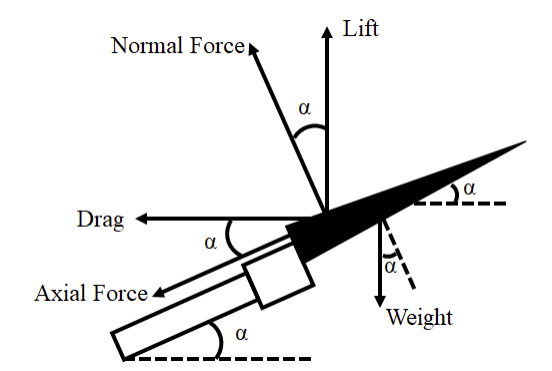|

In [57]:
df_list[0].columns

Index(['Data Point', 'Corr Factor', 'Length Scale[in]', 'AmbPress[psia]',
       'AmbTemp[R]', 'Density[slug/ft3]', 'Viscosity[slug/ft s]',
       'Motor Speed[RPM]', 'Angle of Attack[deg]', 'Corrected q',
       'Avg Velocity[ft/s]', 'Reynolds number', 'Axial Force[Lbf]',
       'Normal Force[Lbf]', 'Pitching Mom[in-Lbf]', 'Angle of Attack[rad]',
       'Lift[Lbf]', 'Drag[Lbf]'],
      dtype='object')

In [81]:
N1 = (df_list[1]['Normal Force[Lbf]']-N0).astype(float)
A1 = (df_list[1]['Axial Force[Lbf]']-A0).astype(float)
alpha = df_list[1]['Angle of Attack[rad]'].astype(float)
lift1 = N1*np.cos(alpha)-A1*np.sin(alpha)
drag1 = N1*np.sin(alpha)+A1*np.cos(alpha)
    
#q = df_list[1]['Corrected q']*144, converted from psi to lb/ft^2

CL_1 = lift1/(df_list[1]['Corrected q']*144*S)
CD_1 = drag1/(df_list[1]['Corrected q']*144*S)
    
df_list[1]['Lift[Lbf]']=lift1
df_list[1]['Drag[Lbf]']=drag1
df_list[1]['Lift Coef'] = CL_1
df_list[1]['Drag Coef'] = CD_1

df_list[1]['Pitching Mom[in-Lbf]'] = df_list[1]['Pitching Mom[in-Lbf]'].astype(float)*0.083333-M0
df_list[1]['Moment Coef'] =  df_list[1]['Pitching Mom[in-Lbf]'] /(df_list[1]['Corrected q']*144*S*mac)                     

df_list[1]


,Data Point,Corr Factor,Length Scale[in],AmbPress[psia],AmbTemp[R],Density[slug/ft3],Viscosity[slug/ft s],Motor Speed[RPM],Angle of Attack[deg],Corrected q,...,Reynolds number,Axial Force[Lbf],Normal Force[Lbf],Pitching Mom[in-Lbf],Angle of Attack[rad],Lift[Lbf],Drag[Lbf],Lift Coef,Drag Coef,Moment Coef
1,1.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,-5.022,0.013,...,19759.947,0.019,-0.053,0.071000,-0.087650,0.147854,0.117508,1.307647,1.039263,5.752080
2,2.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,-3.054,0.012,...,19199.682,0.026,-0.014,0.086500,-0.053302,0.184247,0.112343,1.765305,1.076383,7.591797
3,3.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,-1.069,0.013,...,19698.975,0.035,0.001,0.092708,-0.018658,0.195112,0.111379,1.725603,0.985058,7.510780
4,4.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,0.055,0.012,...,19556.205,0.051,0.003,0.094000,0.000960,0.195882,0.123188,1.876781,1.180288,8.250043
5,5.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,0.945,0.012,...,19398.852,0.052,0.009,0.096208,0.016493,0.200043,0.120316,1.916648,1.152766,8.443860
6,6.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,3.071,0.013,...,19801.791,0.061,0.040,0.108958,0.053599,0.224882,0.120220,1.988898,1.063250,8.827274
7,7.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,4.959,0.013,...,19890.195,0.081,0.062,0.117208,0.086551,0.242285,0.134447,2.142810,1.189073,9.495647
8,8.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,6.985,0.013,...,19709.471,0.082,0.082,0.124791,0.121911,0.257212,0.137298,2.274829,1.214291,10.110011
9,9.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,8.944,0.012,...,19523.682,0.110,0.078,0.120625,0.156102,0.246652,0.150173,2.363218,1.438833,10.586819
10,10.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,10.935,0.012,...,19280.430,0.126,0.085,0.122625,0.190852,0.245057,0.165491,2.347934,1.585599,10.762351


In [82]:
N2 = (df_list[2]['Normal Force[Lbf]']-N0).astype(float)
A2 = (df_list[2]['Axial Force[Lbf]']-A0).astype(float)
alpha = df_list[2]['Angle of Attack[rad]'].astype(float)
lift2 = N2*np.cos(alpha)-A2*np.sin(alpha)
drag2 = N2*np.sin(alpha)+A2*np.cos(alpha)
    
#q = df_list[1]['Corrected q']*144, converted from psi to lb/ft^2

CL_2 = lift2/(df_list[2]['Corrected q']*144*S)
CD_2 = drag2/(df_list[2]['Corrected q']*144*S)
    
df_list[2]['Lift[Lbf]']=lift2
df_list[2]['Drag[Lbf]']=drag2
df_list[2]['Lift Coef'] = CL_2
df_list[2]['Drag Coef'] = CD_2

df_list[2]['Pitching Mom[in-Lbf]'] = df_list[2]['Pitching Mom[in-Lbf]'].astype(float)*0.083333-M0
df_list[2]['Moment Coef'] =  df_list[2]['Pitching Mom[in-Lbf]'] /(df_list[2]['Corrected q']*144*S*mac)                     

df_list[2]

,Data Point,Corr Factor,Length Scale[in],AmbPress[psia],AmbTemp[R],Density[slug/ft3],Viscosity[slug/ft s],Motor Speed[RPM],Angle of Attack[deg],Corrected q,...,Reynolds number,Axial Force[Lbf],Normal Force[Lbf],Pitching Mom[in-Lbf],Angle of Attack[rad],Lift[Lbf],Drag[Lbf],Lift Coef,Drag Coef,Moment Coef
1,1.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,-4.995,0.051,...,39707.570,0.016,-0.196,-0.017194,-0.087179,0.005081,0.127040,0.011454,0.286399,-0.355076
2,2.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,-3.083,0.049,...,39037.227,0.035,-0.122,0.013653,-0.053809,0.076944,0.127046,0.180543,0.298102,0.293454
3,3.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,-1.091,0.050,...,39423.418,0.050,-0.013,0.058576,-0.019042,0.181443,0.126568,0.417225,0.291042,1.233851
4,4.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,-0.006,0.049,...,39079.285,0.062,0.028,0.076236,-0.000105,0.221014,0.133977,0.518590,0.314365,1.638606
5,5.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,1.017,0.051,...,39602.863,0.066,0.090,0.102160,0.017750,0.280630,0.136002,0.632652,0.306603,2.109692
6,6.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,3.070,0.050,...,39442.051,0.074,0.194,0.145993,0.053582,0.377967,0.141445,0.869130,0.325252,3.075187
7,7.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,5.023,0.050,...,39411.465,0.081,0.267,0.176562,0.087668,0.446347,0.152667,1.026369,0.351054,3.719098
8,8.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,6.978,0.050,...,39396.707,0.090,0.340,0.205631,0.121789,0.512346,0.176552,1.178132,0.405978,4.331414
9,9.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,8.964,0.050,...,39114.594,0.104,0.384,0.221173,0.156451,0.549797,0.192011,1.264250,0.441527,4.658782
10,10.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,10.900,0.050,...,39147.984,0.140,0.398,0.216659,0.190241,0.549863,0.238275,1.264403,0.547911,4.563702


In [83]:
N3 = (df_list[3]['Normal Force[Lbf]']-N0).astype(float)
A3 = (df_list[3]['Axial Force[Lbf]']-A0).astype(float)
alpha = df_list[3]['Angle of Attack[rad]'].astype(float)
lift3 = N3*np.cos(alpha)-A3*np.sin(alpha)
drag3 = N3*np.sin(alpha)+A3*np.cos(alpha)
    
#q = df_list[1]['Corrected q']*144, converted from psi to lb/ft^2

CL_3 = lift3/(df_list[3]['Corrected q']*144*S)
CD_3 = drag3/(df_list[3]['Corrected q']*144*S)
    
df_list[3]['Lift[Lbf]']=lift3
df_list[3]['Drag[Lbf]']=drag3
df_list[3]['Lift Coef'] = CL_3
df_list[3]['Drag Coef'] = CD_3

df_list[3]['Pitching Mom[in-Lbf]'] = df_list[3]['Pitching Mom[in-Lbf]'].astype(float)*0.083333-M0
df_list[3]['Moment Coef'] =  df_list[3]['Pitching Mom[in-Lbf]'] /(df_list[3]['Corrected q']*144*S*mac)                     

df_list[3]

,Data Point,Corr Factor,Length Scale[in],AmbPress[psia],AmbTemp[R],Density[slug/ft3],Viscosity[slug/ft s],Motor Speed[RPM],Angle of Attack[deg],Corrected q,...,Reynolds number,Axial Force[Lbf],Normal Force[Lbf],Pitching Mom[in-Lbf],Angle of Attack[rad],Lift[Lbf],Drag[Lbf],Lift Coef,Drag Coef,Moment Coef
1,1.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,-5.016,0.116,...,59851.941,0.048,-0.500,-0.150333,-0.087546,-0.294911,0.185496,-0.292303,0.183855,-1.364914
2,2.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,-3.052,0.113,...,59066.934,0.074,-0.273,-0.056916,-0.053267,-0.071834,0.174071,-0.073089,0.177113,-0.530479
3,3.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,-1.085,0.112,...,58717.352,0.062,-0.046,0.037917,-0.018937,0.148663,0.139210,0.152611,0.142907,0.356552
4,4.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,0.049,0.111,...,58656.789,0.099,0.116,0.104583,0.000855,0.308854,0.171264,0.319912,0.177396,0.992314
5,5.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,0.980,0.110,...,58359.844,0.099,0.226,0.151416,0.017104,0.416134,0.171142,0.434951,0.178881,1.449741
6,6.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,3.012,0.112,...,58879.484,0.100,0.450,0.245416,0.052569,0.632390,0.180478,0.649184,0.185271,2.307784
7,7.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,5.025,0.112,...,58736.617,0.091,0.676,0.339332,0.087703,0.852894,0.198468,0.875543,0.203739,3.190931
8,8.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,6.968,0.108,...,57799.965,0.066,0.801,0.391082,0.121615,0.972884,0.208566,1.035709,0.222034,3.813770
9,9.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,8.947,0.112,...,58899.160,0.101,0.914,0.428915,0.156155,1.073872,0.271310,1.102389,0.278515,4.033330
10,10.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,10.908,0.111,...,58405.758,0.132,1.009,0.457582,0.190381,1.151305,0.346118,1.192526,0.358510,4.341663


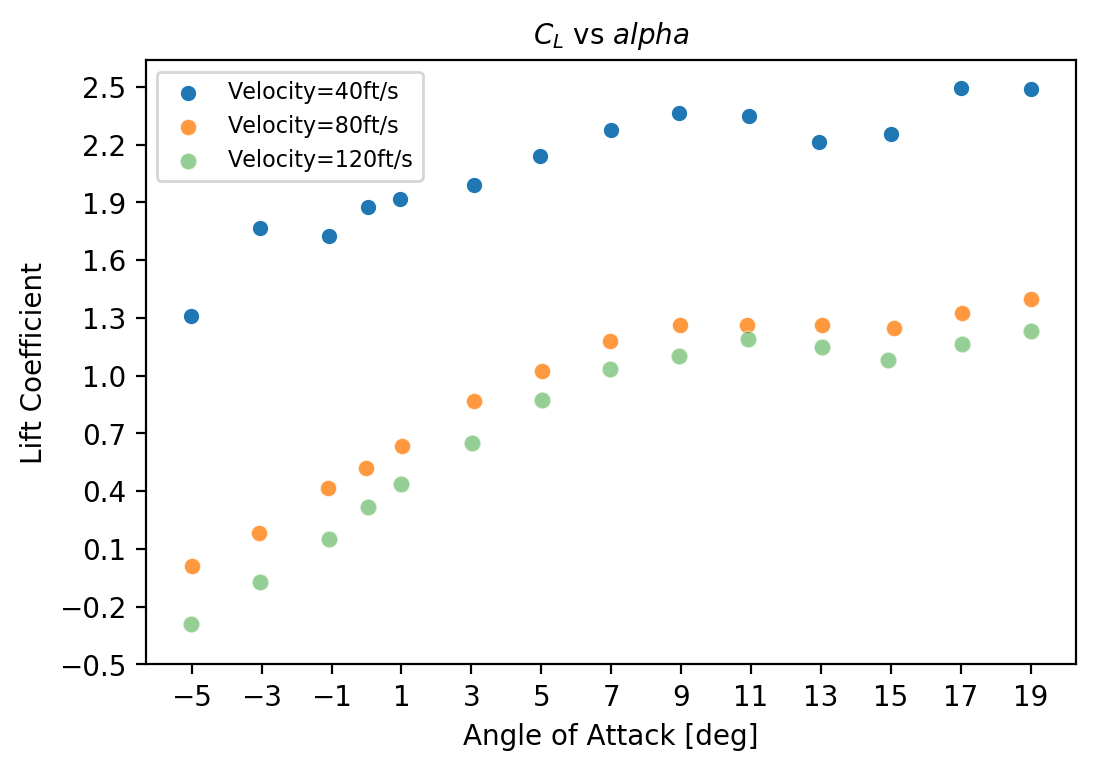

In [119]:
%matplotlib inline
plt.figure(dpi=200);
sns.scatterplot(x='Angle of Attack[deg]',y='Lift Coef',data=df_list[1],label='Velocity=40ft/s');
sns.scatterplot(x='Angle of Attack[deg]',y='Lift Coef',data=df_list[2],label='Velocity=80ft/s',alpha=0.8);
sns.scatterplot(x='Angle of Attack[deg]',y='Lift Coef',data=df_list[3],label='Velocity=120ft/s',alpha=0.5);
plt.legend(fontsize=8)
#plt.yticks(np.arange(-4,4,step=0.3));
plt.xticks(np.arange(-5,21,step=2));
plt.yticks(np.arange(-0.5,2.7,step=0.3));
plt.ylabel('Lift Coefficient',fontsize=10);
plt.xlabel('Angle of Attack [deg]',fontsize=10);
plt.title('$C_L$ vs $alpha$',fontsize=10)
plt.savefig('lift_plot1.png',dpi=200);

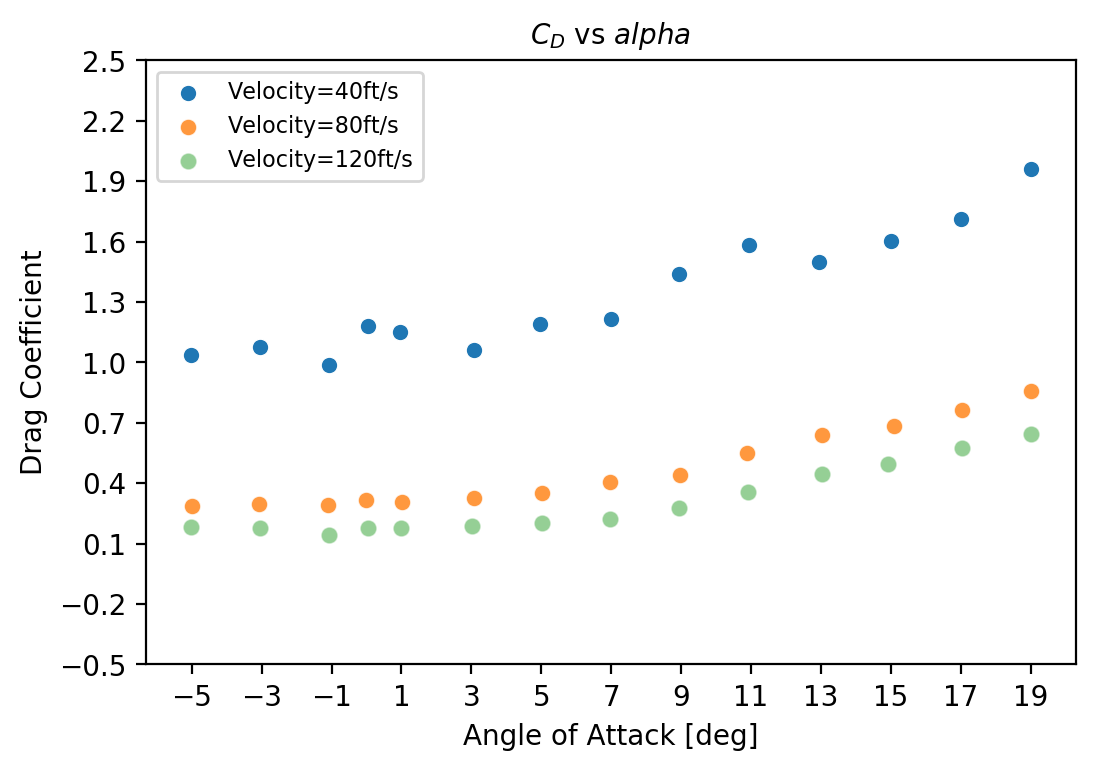

In [118]:
%matplotlib inline
plt.figure(dpi=200);
sns.scatterplot(x='Angle of Attack[deg]',y='Drag Coef',data=df_list[1],label='Velocity=40ft/s');
sns.scatterplot(x='Angle of Attack[deg]',y='Drag Coef',data=df_list[2],label='Velocity=80ft/s',alpha=0.8);
sns.scatterplot(x='Angle of Attack[deg]',y='Drag Coef',data=df_list[3],label='Velocity=120ft/s',alpha=0.5);
plt.legend(fontsize=8)
#plt.yticks(np.arange(-4,4,step=0.3));
plt.xticks(np.arange(-5,21,step=2));
plt.yticks(np.arange(-0.5,2.7,step=0.3));
plt.ylabel('Drag Coefficient',fontsize=10);
plt.xlabel('Angle of Attack [deg]',fontsize=10);
plt.title('$C_D$ vs $alpha$',fontsize=10);
plt.savefig('drag_plot1.png',dpi=200);

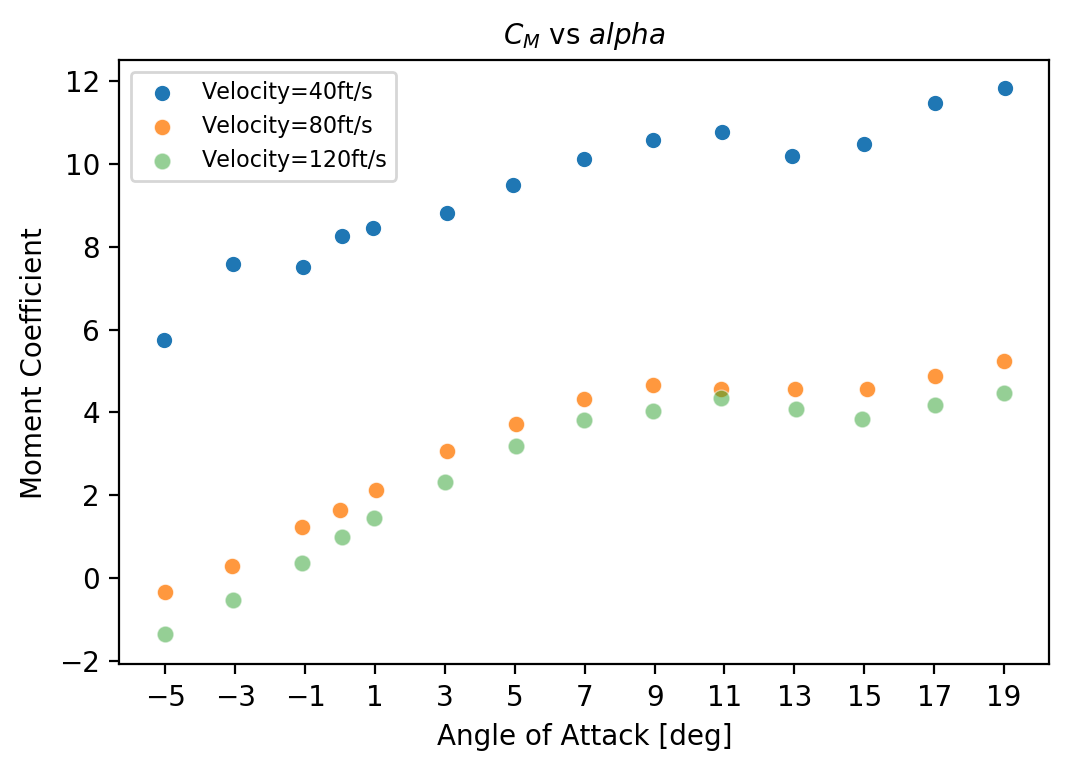

In [117]:
%matplotlib inline
plt.figure(dpi=200);
sns.scatterplot(x='Angle of Attack[deg]',y='Moment Coef',data=df_list[1],label='Velocity=40ft/s');
sns.scatterplot(x='Angle of Attack[deg]',y='Moment Coef',data=df_list[2],label='Velocity=80ft/s',alpha=0.8);
sns.scatterplot(x='Angle of Attack[deg]',y='Moment Coef',data=df_list[3],label='Velocity=120ft/s',alpha=0.5);
plt.legend(fontsize=8)
#plt.yticks(np.arange(-4,4,step=0.3));
plt.xticks(np.arange(-5,21,step=2));

plt.ylabel('Moment Coefficient',fontsize=10);
plt.xlabel('Angle of Attack [deg]',fontsize=10);
plt.title('$C_M$ vs $alpha$',fontsize=10);
plt.savefig('moment_plot1.png',dpi=200);

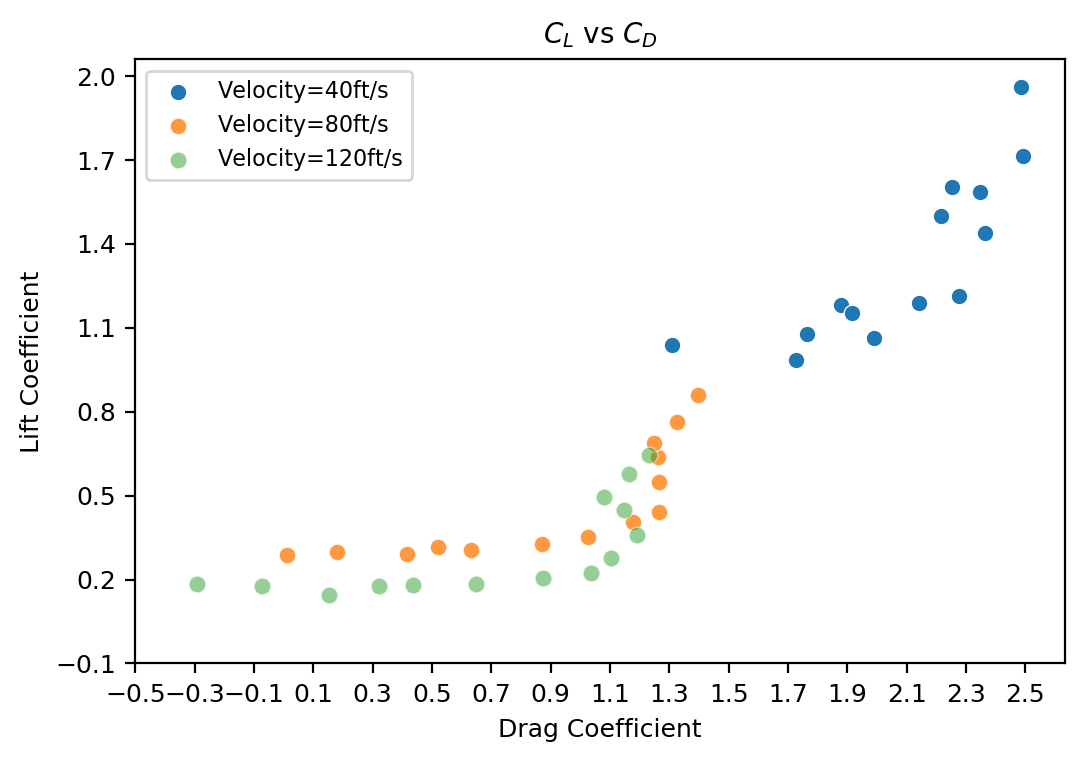

In [116]:
%matplotlib inline
plt.figure(dpi=200);
sns.scatterplot(x='Lift Coef',y='Drag Coef',data=df_list[1],label='Velocity=40ft/s');
sns.scatterplot(x='Lift Coef',y='Drag Coef',data=df_list[2],label='Velocity=80ft/s',alpha=0.8);
sns.scatterplot(x='Lift Coef',y='Drag Coef',data=df_list[3],label='Velocity=120ft/s',alpha=0.5);
plt.legend(fontsize=8)
plt.yticks(np.arange(-0.1,2.3,step=0.3),fontsize=9);
plt.xticks(np.arange(-0.5,2.7,step=0.2),fontsize=9);
plt.ylabel('Lift Coefficient',fontsize=9);
plt.xlabel('Drag Coefficient',fontsize=9);
plt.title('$C_L$ vs $C_D$',fontsize=10);
plt.savefig('CL_vs_CD.png',dpi=200);

### this section below processes data for the test trials when the prototype is rotated 90 degrees

In [19]:
lift_yaw_list1 = []
for i in range(11):
    lift_yaw_list1.append(np.array(df_list_yaw[0]['Normal Force[Lbf]'].values,dtype=float)[i]\
                        *np.cos(np.array(df_list_yaw[0]['Angle of Attack[deg]'].values,dtype=float)[i])-\
                        np.array(df_list_yaw[0]['Axial Force[Lbf]'].values,dtype=float)[i]*\
                        np.sin(np.array(df_list_yaw[0]['Angle of Attack[deg]'].values,dtype=float)[i]))
drag_yaw_list1 = []
for i in range(11):
    drag_yaw_list1.append(np.array(df_list_yaw[0]['Normal Force[Lbf]'].values,dtype=float)[i]\
                        *np.sin(np.array(df_list_yaw[0]['Angle of Attack[deg]'].values,dtype=float)[i])+\
                        np.array(df_list_yaw[0]['Axial Force[Lbf]'].values,dtype=float)[i]*\
                        np.cos(np.array(df_list_yaw[0]['Angle of Attack[deg]'].values,dtype=float)[i]))
    

CL_yaw1 = lift_yaw_list1/(1/2*0.00224915215*np.array(df_list_yaw[0]['Avg Velocity[ft/s]'].values,dtype=float))
CD_yaw1 = drag_yaw_list1/(1/2*0.00224915215*np.array(df_list_yaw[0]['Avg Velocity[ft/s]'].values,dtype=float))

df_list_yaw[0]['Lift[Lbf]']=lift_yaw_list1
df_list_yaw[0]['Drag[Lbf]']=drag_yaw_list1
df_list_yaw[0]['Lift Coef'] = CL_yaw1
df_list_yaw[0]['Drag Coef'] = CD_yaw1
df_list_yaw[0]

,Data Point,Corr Factor,Length Scale[in],AmbPress[psia],AmbTemp[R],Density[slug/ft3],Viscosity[slug/ft s],Motor Speed[RPM],Angle of Attack[deg],Corrected q,Avg Velocity[ft/s],Reynolds number,Axial Force[Lbf],Normal Force[Lbf],Pitching Mom[in-Lbf],Lift[Lbf],Drag[Lbf],Lift Coef,Drag Coef
1,1.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,-10.018,0.0,1.609,790.222,-0.055,0.012,0.047,0.020797,0.052311,11.493717,28.910186
2,2.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,-7.935,0.0,1.104,542.224,-0.062,0.009,0.043,-0.062525,-0.003953,-50.361164,-3.183835
3,3.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,-5.943,-0.0,1.274,625.479,-0.023,0.010,0.040,0.017101,-0.018345,11.936226,-12.804628
4,4.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,-3.946,-0.0,1.504,738.654,-0.046,0.010,0.036,0.026204,0.039107,15.492791,23.121573
5,5.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,-1.935,-0.0,0.959,471.082,0.008,0.009,0.037,0.004269,-0.011259,3.958775,-10.440094
6,6.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,0.032,-0.0,2.294,1126.292,0.027,0.008,0.036,0.007132,0.027242,2.764600,10.559877
7,7.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,1.957,-0.0,3.008,1477.041,0.042,0.007,0.036,-0.041543,-0.009336,-12.280999,-2.759877
8,8.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,3.920,0.0,2.059,1010.763,0.059,0.009,0.039,0.035018,-0.048329,15.123431,-20.872037
9,9.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,6.006,-0.0,0.365,179.433,0.073,0.008,0.039,0.027671,0.068024,67.413039,165.722982
10,10.0,0.907,1.0,14.288,533.07,0.002,0.0,0.0,8.093,-0.0,1.509,740.989,0.086,0.011,0.044,-0.086159,-0.009673,-50.771997,-5.700188
